# Heart Failure Clinical Records Analysis

## Background
Heart failure is a chronic condition where the heart is unable to pump blood efficiently, leading to a variety of health issues and complications. Understanding the factors that contribute to heart failure and patient outcomes is crucial for improving treatment and care.

## Objective
The objective of this project is to analyze the clinical records of heart failure patients to identify key factors associated with patient outcomes. Specifically, we aim to determine the features that are most predictive of survival in heart failure patients.

## Dataset Description
The dataset used in this analysis is the "Heart Failure Clinical Records" dataset from Kaggle. It contains 299 records of heart failure patients, with features such as age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine, serum sodium, and time. The target variable is `DEATH_EVENT`, indicating whether the patient experienced a death event.

## Methodology
The analysis will involve the following key steps:
1. **Exploratory Data Analysis (EDA):** Conduct an in-depth exploration of the dataset to identify patterns, relationships, and  outliers.
2. **Feature Engineering:** Create new features.
3. **Interpretation of Results:** Interpret the findings and understand the implications for heart failure treatment and care.


## Significance
This project aims to provide valuable insights into the factors that influence heart failure patient outcomes. By identifying key predictors of survival, we can contribute to improving patient care and treatment strategies, ultimately leading to better health outcomes for heart failure patients.


## > Use the required libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## > Open the required heart failure dataset

In [94]:
# Open the heart failure dataset
df = pd.read_csv('/Users/mac/Documents/Kaggle/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [95]:
# To check the number of rows and columns
df.shape

(299, 13)

In [96]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## > Identify any missing values

In [125]:
# Check for missing values
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [97]:
# Get the summary of the statistics
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## To get the age distribution 

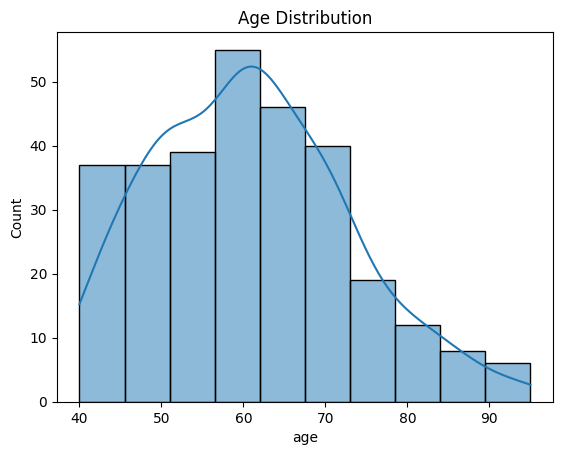

In [98]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# > Identify outliers

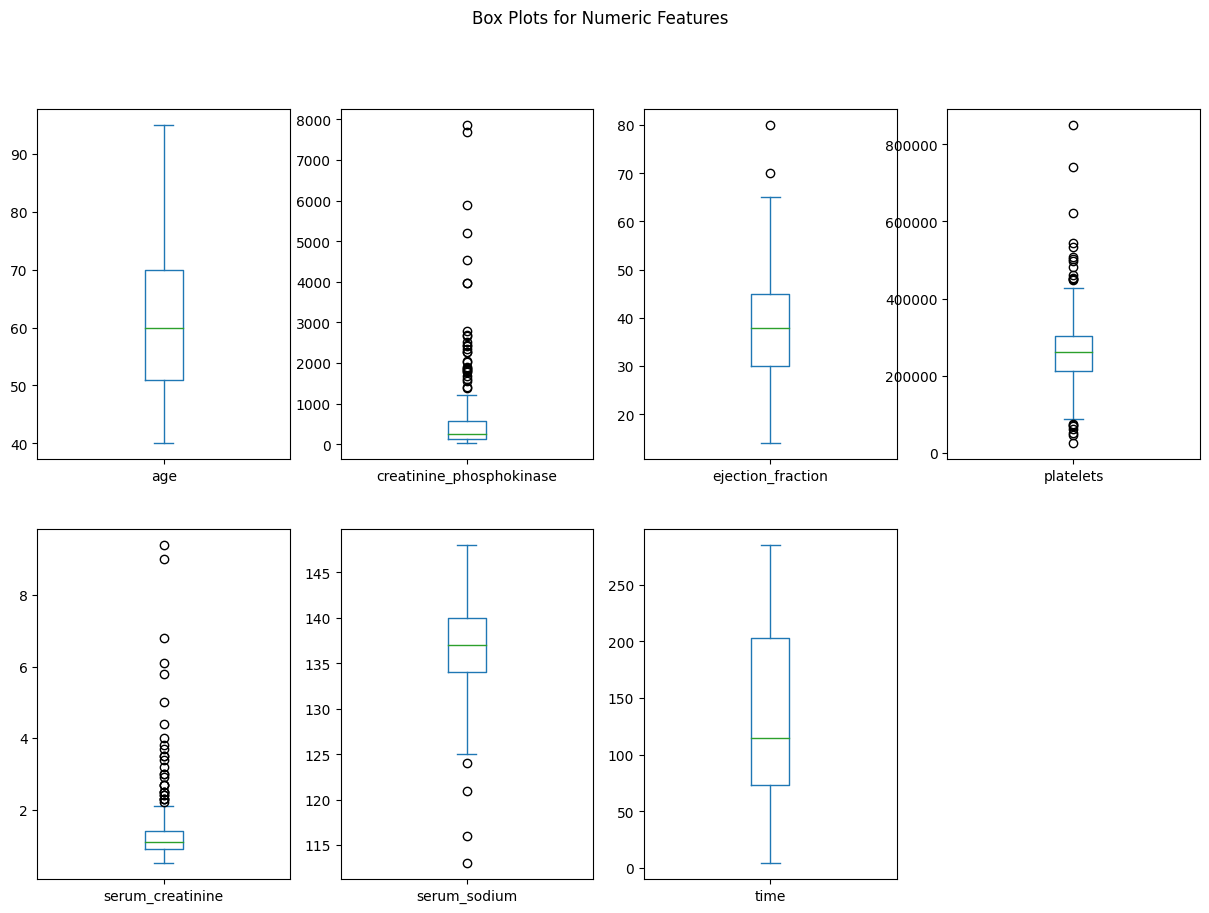

In [99]:
# Create a boxplot of the following columns 
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[numeric_features].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10))
plt.suptitle('Box Plots for Numeric Features')
plt.show()

In [100]:
# Calculate IQR for creatinine_phosphokinase
Q1 = df['creatinine_phosphokinase'].quantile(0.25)
Q3 = df['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = df[(df['creatinine_phosphokinase'] >= lower_bound) & (df['creatinine_phosphokinase'] <= upper_bound)]


In [101]:
# Remove outliers for creatinine_phosphokinase
df = df[(df['creatinine_phosphokinase'] >= lower_bound) & (df['creatinine_phosphokinase'] <= upper_bound)]

In [102]:
# Calculate IQR and filter out outliers for all specified features
def remove_outliers(data, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Apply the function to each feature
data_no_outliers = remove_outliers(df, 'serum_creatinine')
data_no_outliers = remove_outliers(data_no_outliers, 'serum_sodium')
data_no_outliers = remove_outliers(data_no_outliers, 'ejection_fraction')

# Verify the outliers have been removed
print(data_no_outliers.describe())


              age     anaemia  creatinine_phosphokinase    diabetes  \
count  268.000000  268.000000                268.000000  268.000000   
mean    61.381843    0.455224                330.985075    0.425373   
std     11.954681    0.498923                278.228882    0.495324   
min     40.000000    0.000000                 23.000000    0.000000   
25%     52.000000    0.000000                109.750000    0.000000   
50%     60.000000    0.000000                212.500000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               1211.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         268.000000           268.000000     268.000000   
mean           37.847015             0.361940  263590.524627   
std            11.578543             0.481461   95059.975488   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

## To check if the outliers were removed.

In [103]:
# confirm the number of rows and columns
df.shape

(270, 13)

In [104]:
# Calculate IQR and identify outliers for serum_creatinine
Q1_creatinine = data_no_outliers['serum_creatinine'].quantile(0.25)
Q3_creatinine = data_no_outliers['serum_creatinine'].quantile(0.75)
IQR_creatinine = Q3_creatinine - Q1_creatinine
lower_bound_creatinine = Q1_creatinine - 1.5 * IQR_creatinine
upper_bound_creatinine = Q3_creatinine + 1.5 * IQR_creatinine

# Calculate IQR and identify outliers for serum_sodium
Q1_sodium = data_no_outliers['serum_sodium'].quantile(0.25)
Q3_sodium = data_no_outliers['serum_sodium'].quantile(0.75)
IQR_sodium = Q3_sodium - Q1_sodium
lower_bound_sodium = Q1_sodium - 1.5 * IQR_sodium
upper_bound_sodium = Q3_sodium + 1.5 * IQR_sodium

In [105]:
# Remove outliers for serum_creatinine
data_no_outliers = data_no_outliers[(data_no_outliers['serum_creatinine'] >= lower_bound_creatinine) & (data_no_outliers['serum_creatinine'] <= upper_bound_creatinine)]

# Remove outliers for serum_sodium
data_no_outliers = data_no_outliers[(data_no_outliers['serum_sodium'] >= lower_bound_sodium) & (data_no_outliers['serum_sodium'] <= upper_bound_sodium)]

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  244.000000  244.000000                244.000000  244.000000   
mean    61.034156    0.454918                334.336066    0.430328   
std     11.952743    0.498987                273.275381    0.496140   
min     40.000000    0.000000                 30.000000    0.000000   
25%     51.000000    0.000000                114.500000    0.000000   
50%     60.000000    0.000000                222.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               1202.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         244.000000           244.000000     244.000000   
mean           38.131148             0.368852  265634.846598   
std            11.625112             0.483486   94375.593550   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

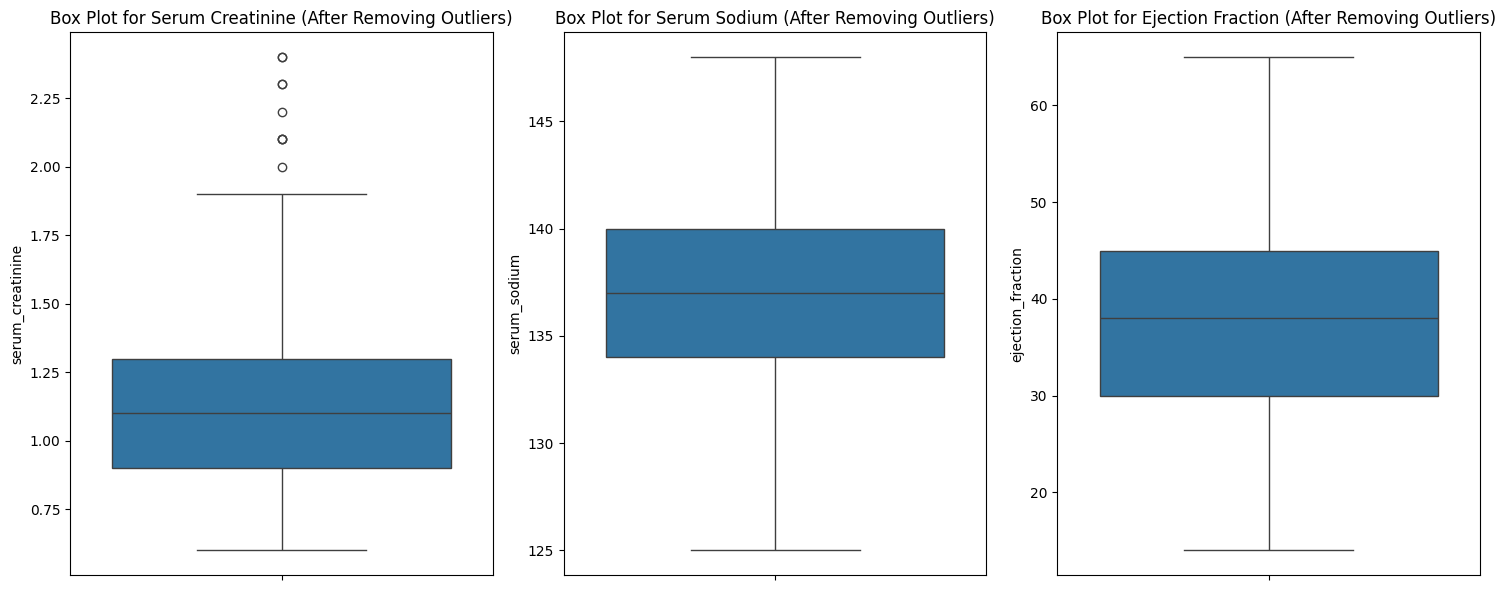

In [106]:
# Summary statistics for the cleaned dataset
print(data_no_outliers.describe())

# Visualize the cleaned data using box plots
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_no_outliers['serum_creatinine'])
plt.title('Box Plot for Serum Creatinine (After Removing Outliers)')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_no_outliers['serum_sodium'])
plt.title('Box Plot for Serum Sodium (After Removing Outliers)')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_no_outliers['ejection_fraction'])
plt.title('Box Plot for Ejection Fraction (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [107]:
# Calculate IQR for serum_creatinine
Q1_creatinine = data_no_outliers['serum_creatinine'].quantile(0.25)
Q3_creatinine = data_no_outliers['serum_creatinine'].quantile(0.75)
IQR_creatinine = Q3_creatinine - Q1_creatinine

# Define outlier thresholds
lower_bound_creatinine = Q1_creatinine - 1.5 * IQR_creatinine
upper_bound_creatinine = Q3_creatinine + 1.5 * IQR_creatinine

# Filter out outliers
data_no_outliers = data_no_outliers[(data_no_outliers['serum_creatinine'] >= lower_bound_creatinine) & (data_no_outliers['serum_creatinine'] <= upper_bound_creatinine)]

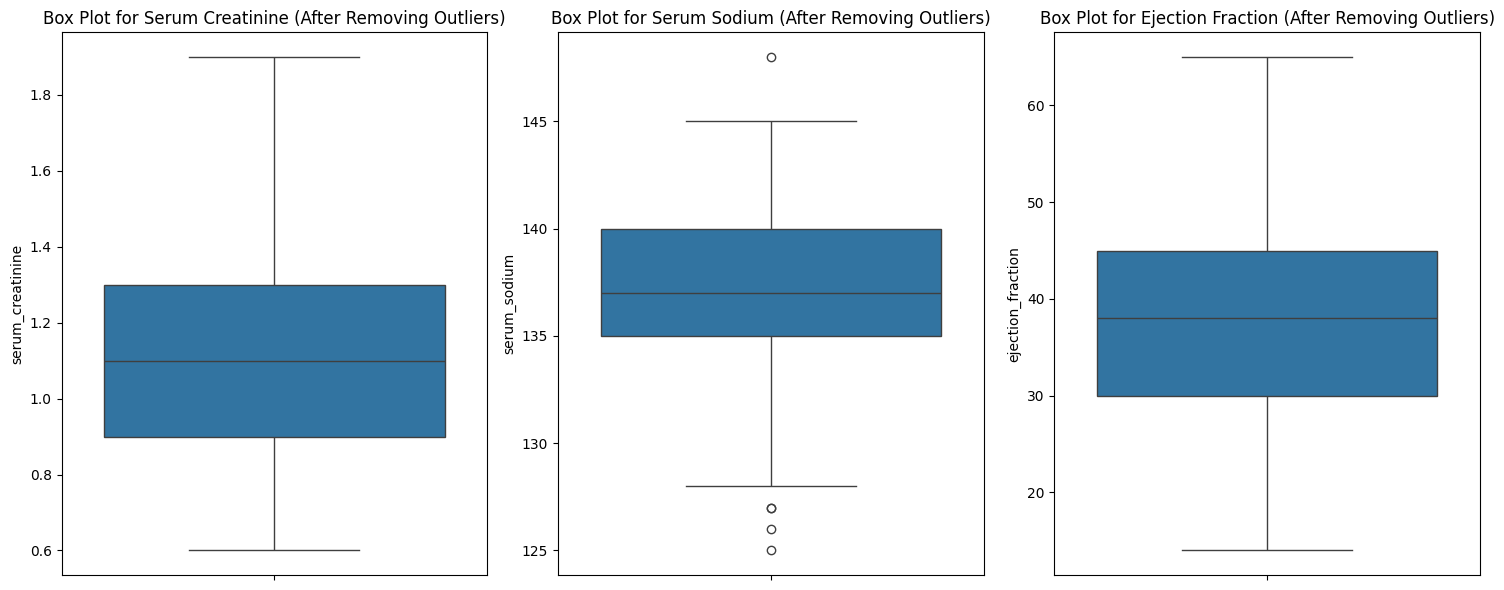

In [108]:
# Visualize the cleaned data using box plots
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_no_outliers['serum_creatinine'])
plt.title('Box Plot for Serum Creatinine (After Removing Outliers)')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_no_outliers['serum_sodium'])
plt.title('Box Plot for Serum Sodium (After Removing Outliers)')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_no_outliers['ejection_fraction'])
plt.title('Box Plot for Ejection Fraction (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [109]:
# Calculate IQR for serum_sodium
Q1_sodium = data_no_outliers['serum_sodium'].quantile(0.25)
Q3_sodium = data_no_outliers['serum_sodium'].quantile(0.75)
IQR_sodium = Q3_sodium - Q1_sodium

# Define outlier thresholds
lower_bound_sodium = Q1_sodium - 1.5 * IQR_sodium
upper_bound_sodium = Q3_sodium + 1.5 * IQR_sodium

# Filter out outliers
data_no_outliers = data_no_outliers[(data_no_outliers['serum_sodium'] >= lower_bound_sodium) & (data_no_outliers['serum_sodium'] <= upper_bound_sodium)]

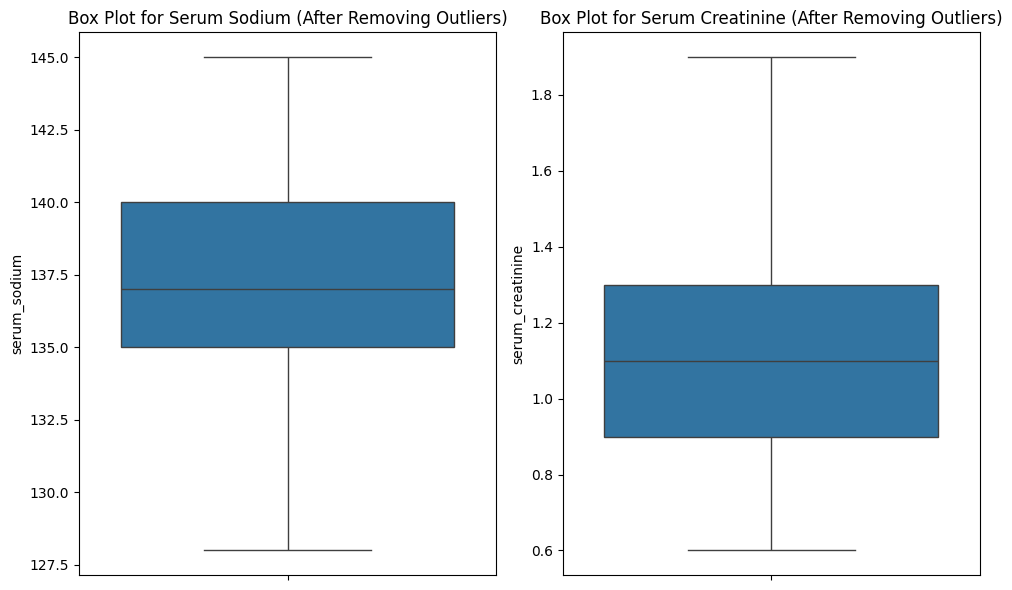

In [110]:
# Visualize the cleaned data using box plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_no_outliers['serum_sodium'])
plt.title('Box Plot for Serum Sodium (After Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_no_outliers['serum_creatinine'])
plt.title('Box Plot for Serum Creatinine (After Removing Outliers)')

plt.tight_layout()
plt.show()

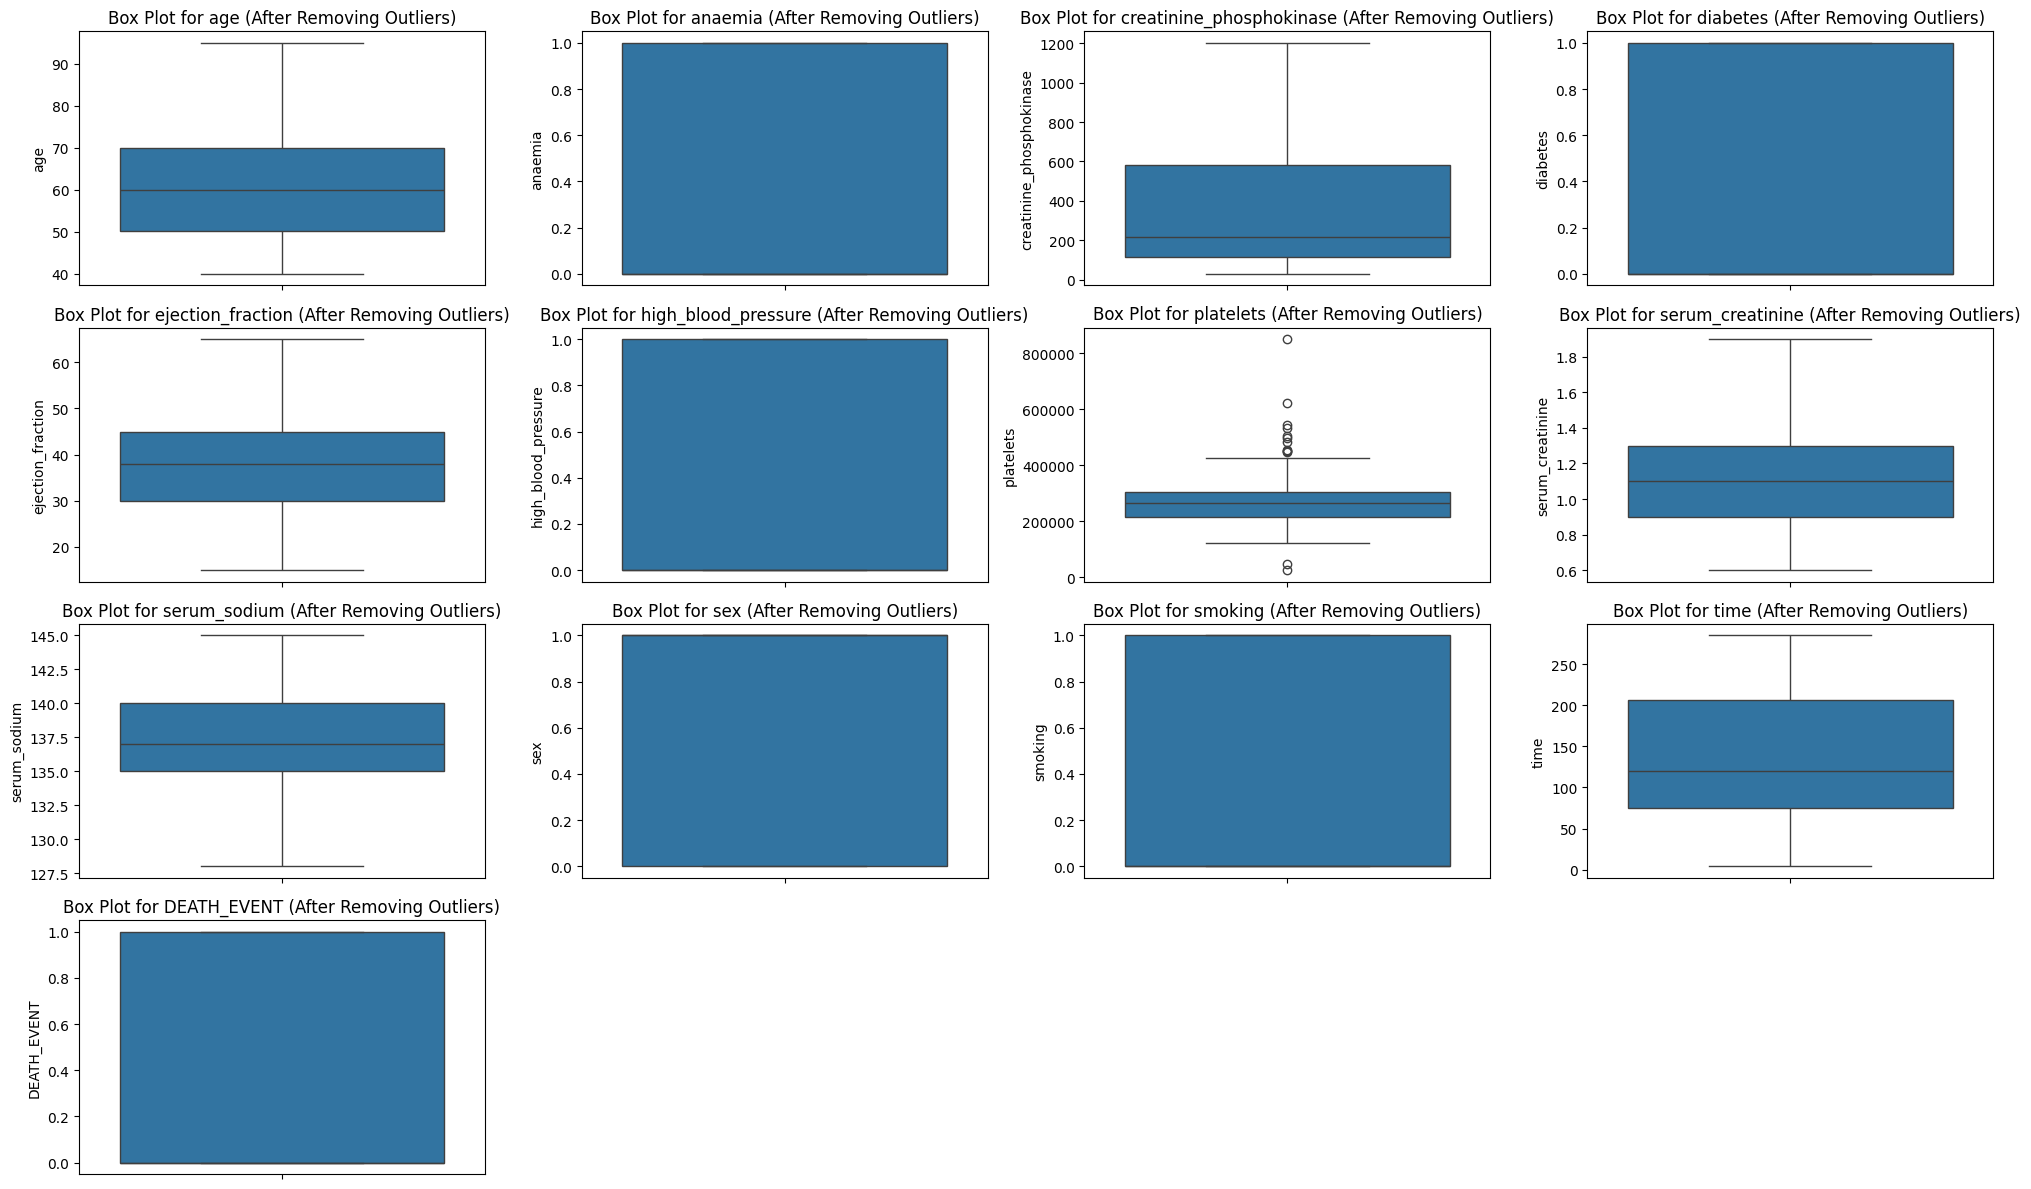

In [111]:
# Generate box plots for all numeric columns
plt.figure(figsize=(20, 12))

numeric_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(f'Box Plot for {col} (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [112]:
# Calculate IQR for platelets
Q1_platelets = data_no_outliers['platelets'].quantile(0.25)
Q3_platelets = data_no_outliers['platelets'].quantile(0.75)
IQR_platelets = Q3_platelets - Q1_platelets

# Define outlier thresholds
lower_bound_platelets = Q1_platelets - 1.5 * IQR_platelets
upper_bound_platelets = Q3_platelets + 1.5 * IQR_platelets

# Filter out outliers
data_no_outliers = data_no_outliers[(data_no_outliers['platelets'] >= lower_bound_platelets) & (data_no_outliers['platelets'] <= upper_bound_platelets)]

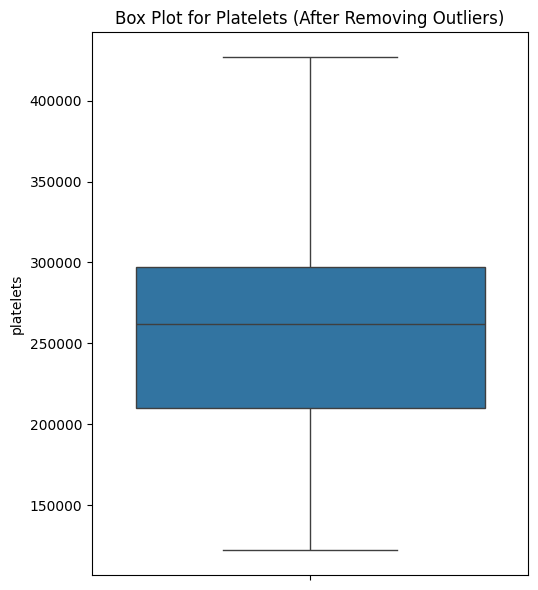

In [114]:
# Visualize the cleaned data using box plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_no_outliers['platelets'])
plt.title('Box Plot for Platelets (After Removing Outliers)')

plt.tight_layout()
plt.show()

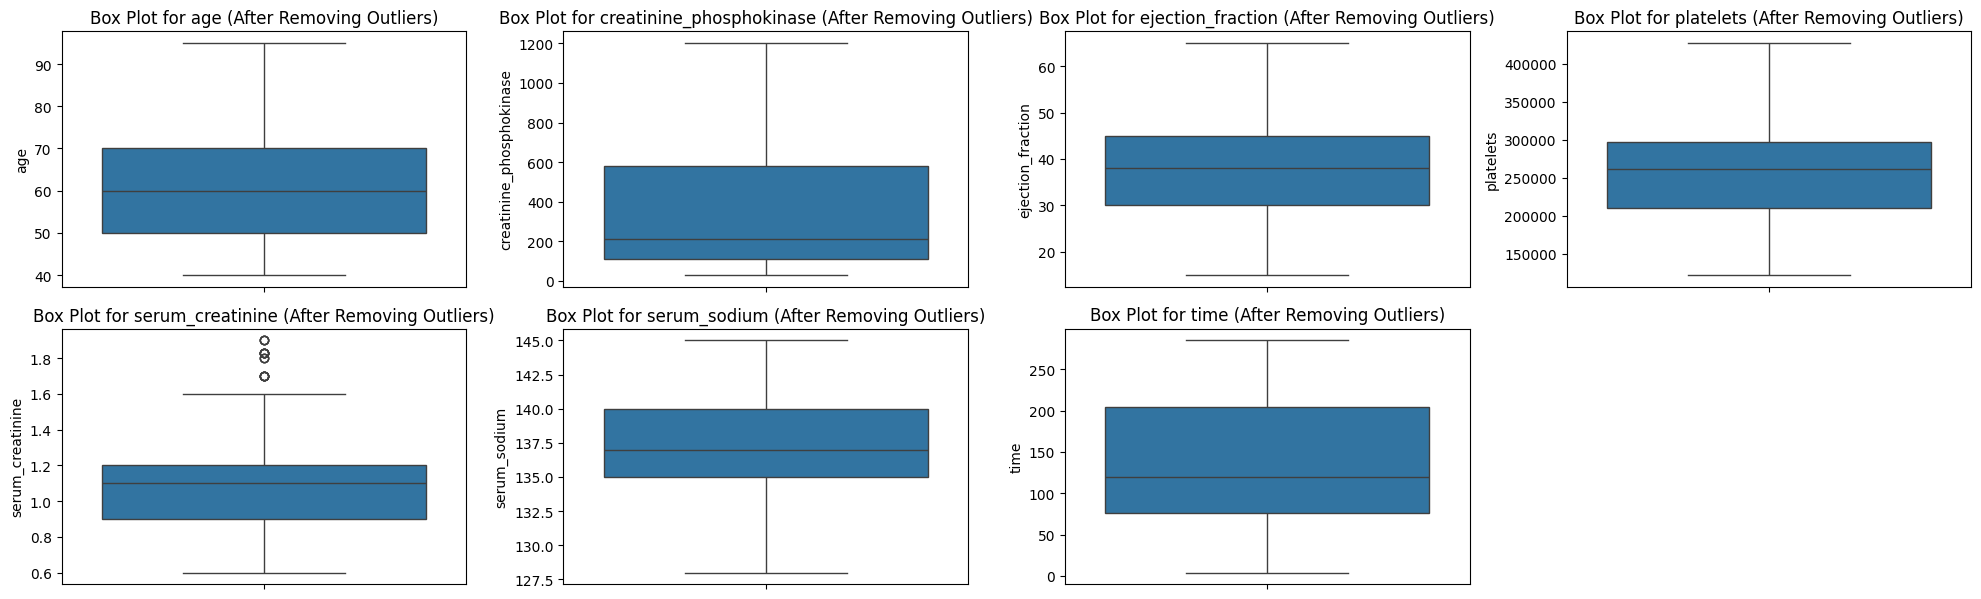

In [115]:
# List of numeric columns
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Generate box plots for all numeric columns
plt.figure(figsize=(20, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(f'Box Plot for {col} (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [116]:
# Recalculate IQR for serum_creatinine
Q1_creatinine = data_no_outliers['serum_creatinine'].quantile(0.25)
Q3_creatinine = data_no_outliers['serum_creatinine'].quantile(0.75)
IQR_creatinine = Q3_creatinine - Q1_creatinine

# Define outlier thresholds
lower_bound_creatinine = Q1_creatinine - 1.5 * IQR_creatinine
upper_bound_creatinine = Q3_creatinine + 1.5 * IQR_creatinine

# Identify outliers
outliers_creatinine = data_no_outliers[(data_no_outliers['serum_creatinine'] < lower_bound_creatinine) | (data_no_outliers['serum_creatinine'] > upper_bound_creatinine)]
print("Outliers in Serum Creatinine:")
print(outliers_creatinine)

Outliers in Serum Creatinine:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
3    50.0        1                       111         0                 20   
24   75.0        0                       582         1                 30   
25   80.0        0                       148         1                 38   
30   94.0        0                       582         1                 38   
40   70.0        0                       582         0                 20   
45   50.0        0                       582         1                 38   
80   70.0        0                        69         0                 40   
83   79.0        1                        55         0                 50   
93   60.0        1                       154         0                 25   
119  86.0        0                       582         0                 38   
144  72.0        1                       943  

count    196.000000
mean       1.042296
std        0.226694
min        0.600000
25%        0.900000
50%        1.000000
75%        1.200000
max        1.600000
Name: serum_creatinine, dtype: float64


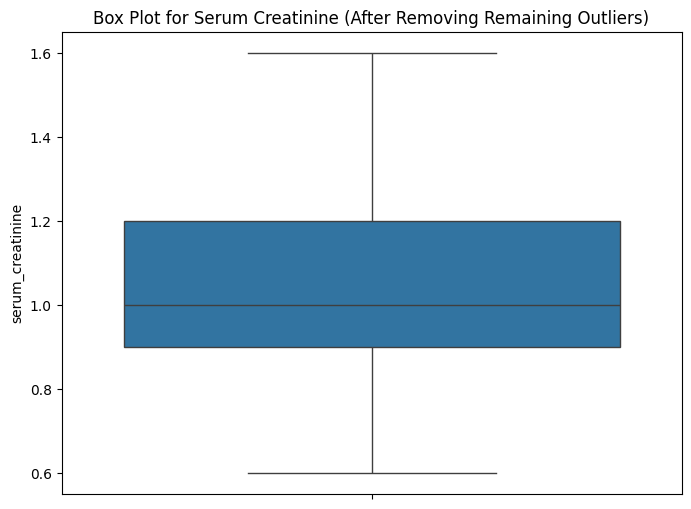

In [117]:
# Remove outliers for serum_creatinine
data_no_outliers = data_no_outliers[(data_no_outliers['serum_creatinine'] >= lower_bound_creatinine) & (data_no_outliers['serum_creatinine'] <= upper_bound_creatinine)]

# Verify removal by checking the summary statistics and box plot again
print(data_no_outliers['serum_creatinine'].describe())

# Visualize the cleaned data using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_no_outliers['serum_creatinine'])
plt.title('Box Plot for Serum Creatinine (After Removing Remaining Outliers)')
plt.show()

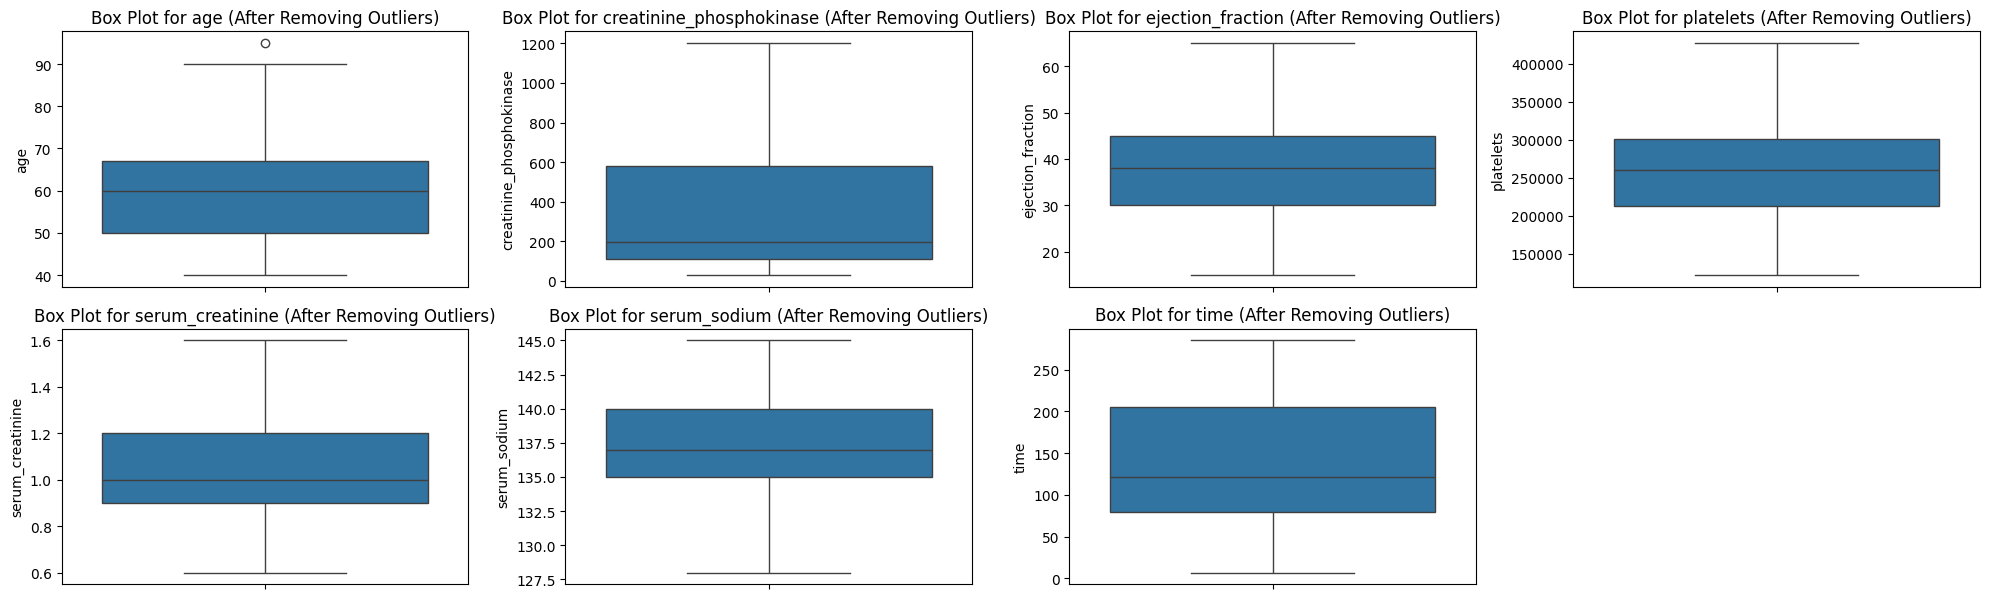

In [118]:
# List of numeric columns
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Generate box plots for all numeric columns
plt.figure(figsize=(20, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(f'Box Plot for {col} (After Removing Outliers)')

plt.tight_layout()
plt.show()

# > Perform Exploratory Data Analysis

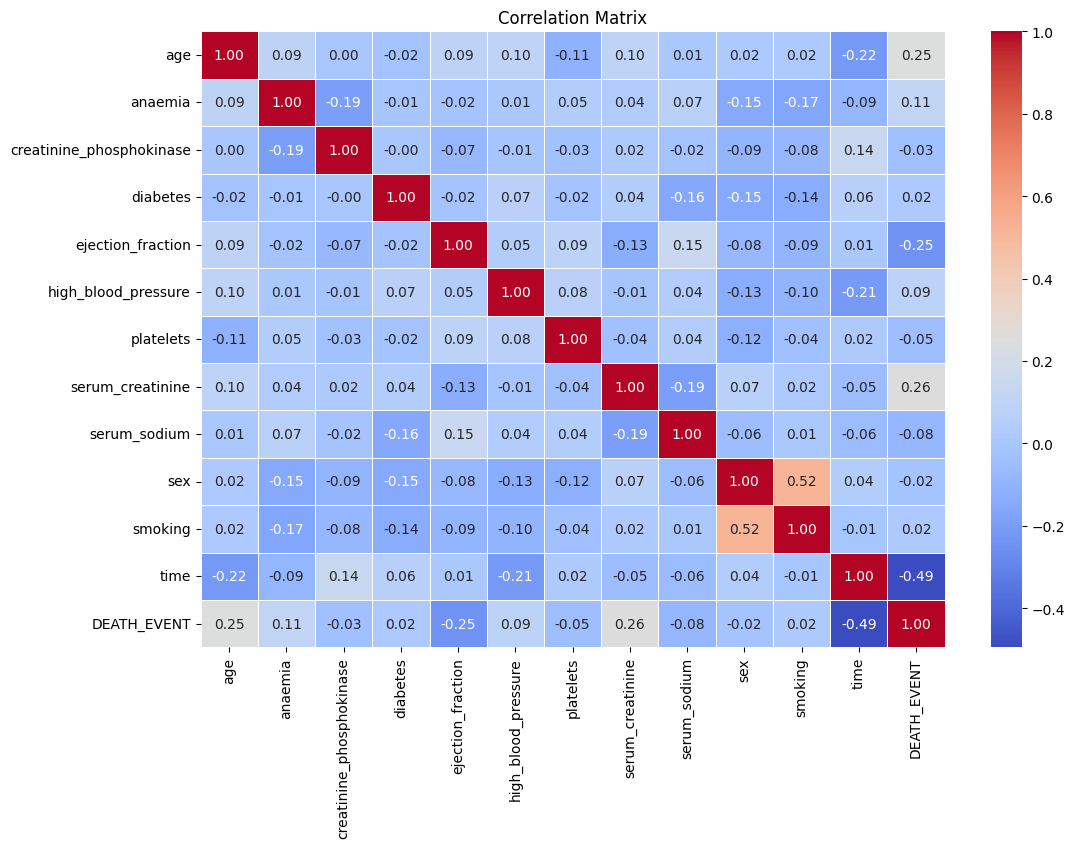

In [122]:
# Calculate the correlation matrix
correlation_matrix = data_no_outliers.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**From the correlation matrix, we observe that ejection_fraction and serum_creatinine have a moderate negative correlation. Additionally, age and serum_sodium show a weak positive correlation. The strongest correlation with DEATH_EVENT is observed with serum_creatinine.**

# > Feature Engineerng

## **1. Create a new binary feature for age groups**

In [127]:
# Create a binary feature for age groups
df['age_group'] = df['age'].apply(lambda x: 'young' if x < 50 else 'old')

## **2. Applying log transformation to handle skewness**

In [128]:
# Log transformation for skewed data
df['creatinine_phosphokinase_log'] = np.log1p(df['creatinine_phosphokinase'])
df['serum_creatinine_log'] = np.log1p(df['serum_creatinine'])

# > Findings

## ***1. Age Distribution***

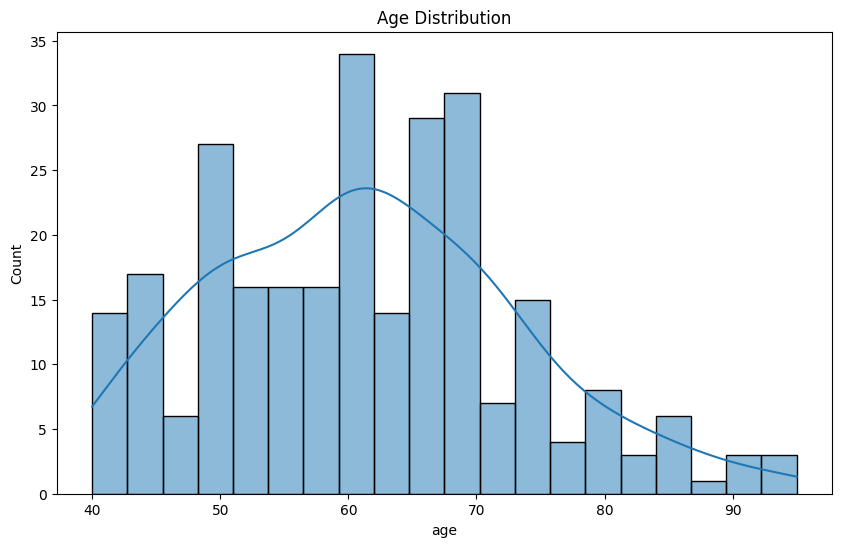

In [131]:
# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

**The majority of patients are aged 40 and above, with a significant portion being elderly. This insight suggests that age may play an important role in the analysis.**

## ***2. Ejection Fraction and Death Event***

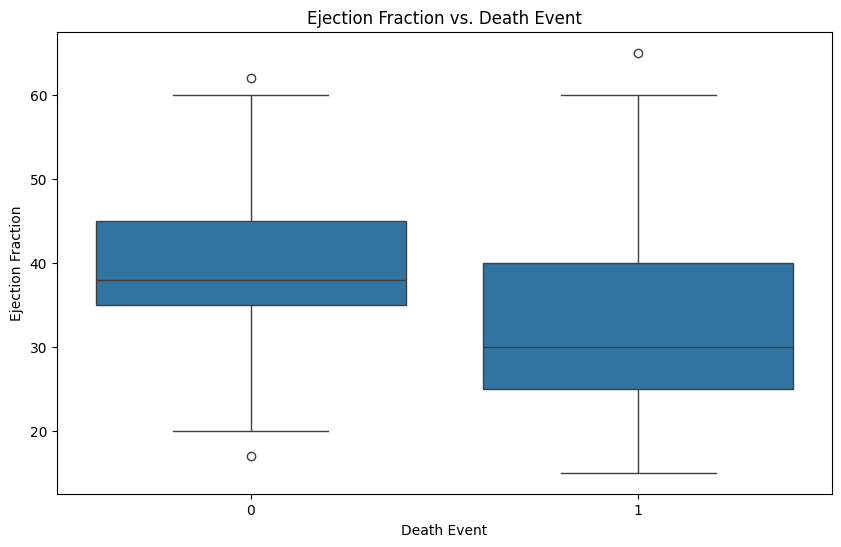

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data_no_outliers)
plt.title('Ejection Fraction vs. Death Event')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.show()

**Patients who experienced a death event tend to have lower ejection fractions. This relationship suggests that ejection fraction is a critical factor in predicting death events.**

## ***3. Correlation Matrix***

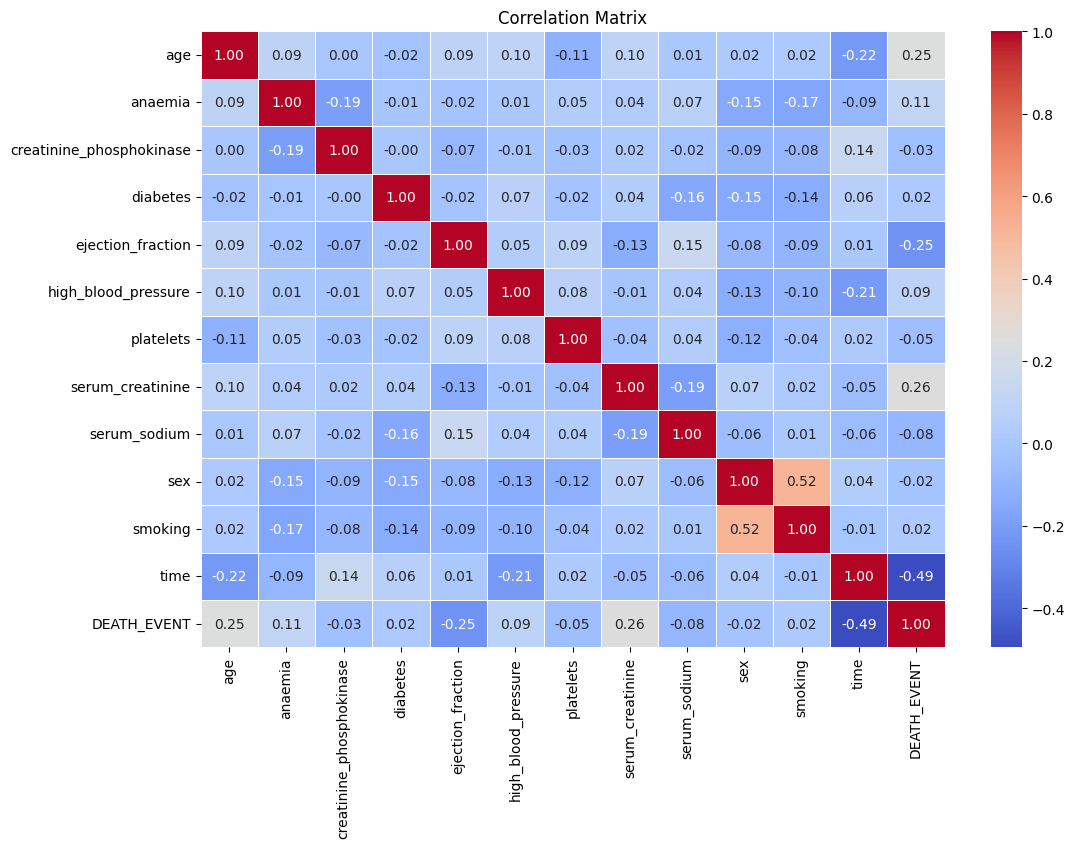

In [133]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**The strongest correlation with DEATH_EVENT is observed with serum_creatinine. This emphasizes the importance of serum creatinine in the analysis.**

# Conclusion

## Recap of Objectives
The objective of this project was to analyze the clinical records of heart failure patients to identify key factors associated with patient outcomes. Specifically, we aimed to determine the features that are most predictive of survival in heart failure patients.

## Summary of Key Findings
1. **Age Distribution:** The majority of patients are aged 40 and above, with a significant portion being elderly. Age was found to be an important factor in the analysis.
2. **Ejection Fraction:** Patients who experienced a death event tend to have lower ejection fractions, indicating its significance as a predictor of patient outcomes.
3. **Correlation Matrix:** The strongest correlation with `DEATH_EVENT` was observed with serum creatinine, reinforcing its critical role in predicting patient outcomes.

## Implications
The insights gained from this analysis highlight the importance of monitoring ejection fraction and serum creatinine levels in heart failure patients. These factors can provide valuable information for healthcare providers to improve treatment strategies and patient care.

## Limitations
The analysis was limited by the size of the dataset and the availability of certain features. Further research with larger datasets and additional clinical variables could provide more comprehensive insights.

## Future Work
Future research could explore the use of advanced learning models to predict patient outcomes more accurately. Additionally, incorporating other clinical features and patient outcomes.

By conducting this analysis, we have gained valuable insights into the factors that influence heart failure patient outcomes. These findings can contribute to improving patient care and treatment strategies, ultimately leading to better health outcomes for heart failure patients.


## References

## ***www.kaggle.com***